Streaming output truncated to the last 5000 lines.
|  49.989999999974415  |  30.0 |   2978.9100999972115  |   2079.0900999976725   |   2529.0000999974422  |
|  49.97999999997441   |  30.0 |   2977.8203999972116  |   2078.1803999976723   |   2528.000399997442   |
|  49.969999999974405  |  30.0 |   2976.7308999972115  |   2077.2708999976726   |   2527.000899997442   |
|   49.9599999999744   |  30.0 |   2975.6415999972114  |   2076.3615999976723   |   2526.001599997442   |
|  49.949999999974395  |  30.0 |   2974.5524999972113  |   2075.4524999976725   |   2525.002499997442   |
|  49.93999999997439   |  30.0 |   2973.4635999972115  |   2074.5435999976726   |   2524.0035999974425  |
|  49.929999999974385  |  30.0 |   2972.3748999972113  |   2073.6348999976726   |   2523.004899997442   |
|  49.91999999997438   |  30.0 |   2971.2863999972114  |   2072.7263999976726   |   2522.006399997442   |
|  49.909999999974374  |  30.0 |   2970.1980999972116  |   2071.8180999976726   |   2521.008099997442

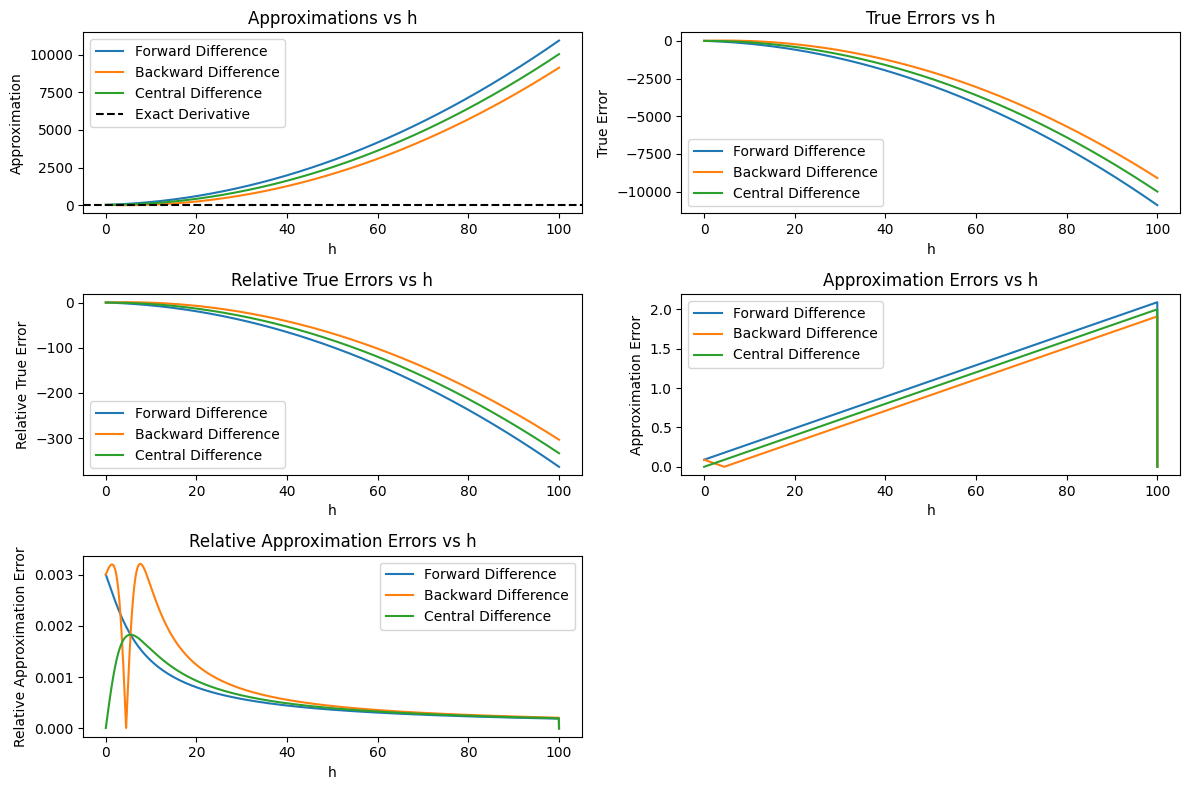

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

def f(x):
    return x**3 + 3*x

def f_prime(x):
    return 3*x**2 + 3

x = float(input())

h_values = np.arange(100, 0, -0.01)

exact_deriv = f_prime(x)
forward_approx = []
backward_approx = []
central_approx = []
true_error_for = []
true_error_back = []
true_error_cen = []
rel_true_error_for = []
rel_true_error_back = []
rel_true_error_cen = []
approx_error_for = []
approx_error_back = []
approx_error_cen = []
relative_approx_error_for = []
relative_approx_error_back = []
relative_approx_error_cen = []
table = PrettyTable()
table.field_names = ["h", "f'(x)", "Forward Approximation", "Backward Approximation", "Central Approximation"]


for i in range(len(h_values)):
    h = h_values[i]
    forward_diff = (f(x + h) - f(x)) / h
    backward_diff = (f(x) - f(x - h)) / h
    central_diff = (f(x + h) - f(x - h)) / (2 * h)

    forward_approx.append(forward_diff)
    backward_approx.append(backward_diff)
    central_approx.append(central_diff)

    true_error_forward = exact_deriv - forward_diff
    true_error_backward = exact_deriv - backward_diff
    true_error_central = exact_deriv - central_diff

    true_error_for.append(true_error_forward)
    true_error_back.append(true_error_backward)
    true_error_cen.append(true_error_central)

    rel_true_error_forward = true_error_forward / exact_deriv
    rel_true_error_backward = true_error_backward / exact_deriv
    rel_true_error_central = true_error_central / exact_deriv

    rel_true_error_for.append(rel_true_error_forward)
    rel_true_error_back.append(rel_true_error_backward)
    rel_true_error_cen.append(rel_true_error_central)

    if i == 0:
        approx_error_forward = 0
        approx_error_backward = 0
        approx_error_central = 0
    else:
        approx_error_forward = abs(forward_approx[i] - forward_approx[i - 1])
        approx_error_backward = abs(backward_approx[i] - backward_approx[i - 1])
        approx_error_central = abs(central_approx[i] - central_approx[i - 1])

    approx_error_for.append(approx_error_forward)
    approx_error_back.append(approx_error_backward)
    approx_error_cen.append(approx_error_central)

    relative_approx_error_forward = approx_error_forward / forward_approx[i]
    relative_approx_error_backward = approx_error_backward / backward_approx[i]
    relative_approx_error_central = approx_error_central / central_approx[i]

    relative_approx_error_for.append(relative_approx_error_forward)
    relative_approx_error_back.append(relative_approx_error_backward)
    relative_approx_error_cen.append(relative_approx_error_central)

for i in range(len(h_values)):
    table.add_row([h_values[i], exact_deriv, forward_approx[i], backward_approx[i], central_approx[i]])

print(table)
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(h_values, forward_approx, label='Forward Difference')
plt.plot(h_values, backward_approx, label='Backward Difference')
plt.plot(h_values, central_approx, label='Central Difference')
plt.axhline(y=exact_deriv, color='black', linestyle='--', label='Exact Derivative')
plt.xlabel('h')
plt.ylabel("Approximation")
plt.title("Approximations vs h")
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(h_values, true_error_for, label='Forward Difference')
plt.plot(h_values, true_error_back, label='Backward Difference')
plt.plot(h_values, true_error_cen, label='Central Difference')
plt.xlabel('h')
plt.ylabel("True Error")
plt.title("True Errors vs h")
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(h_values, rel_true_error_for, label='Forward Difference')
plt.plot(h_values, rel_true_error_back, label='Backward Difference')
plt.plot(h_values, rel_true_error_cen, label='Central Difference')
plt.xlabel('h')
plt.ylabel("Relative True Error")
plt.title("Relative True Errors vs h")
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(h_values, approx_error_for, label='Forward Difference')
plt.plot(h_values, approx_error_back, label='Backward Difference')
plt.plot(h_values, approx_error_cen, label='Central Difference')
plt.xlabel('h')
plt.ylabel("Approximation Error")
plt.title("Approximation Errors vs h")
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(h_values, relative_approx_error_for, label='Forward Difference')
plt.plot(h_values, relative_approx_error_back, label='Backward Difference')
plt.plot(h_values, relative_approx_error_cen, label='Central Difference')
plt.xlabel('h')
plt.ylabel("Relative Approximation Error")
plt.title("Relative Approximation Errors vs h")
plt.legend()

plt.tight_layout()
plt.show()


